In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb#seaborn另一个简写是sns

%matplotlib inline

In [2]:
fuel_econ = pd.read_csv('./data/fuel_econ.csv')
#燃油效率的数据集 记录了3929辆轿车的数据
#生产年份2013-2018
print(fuel_econ.shape)
fuel_econ.head()

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [3]:
# 研究定性变量之间的关系 燃油效率和车辆类型

#这里使用了pandas的函数 astype Vclass 转换成有序的分类类型
# 微型车 小型车 紧凑型车 中型车 大型车
sedan_classes = ['Minicompact Cars','Subcompact Cars','Compact Cars','Midsize Cars','Large Cars']

vclasses = pd.api.types.CategoricalDtype(ordered = True,categories = sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

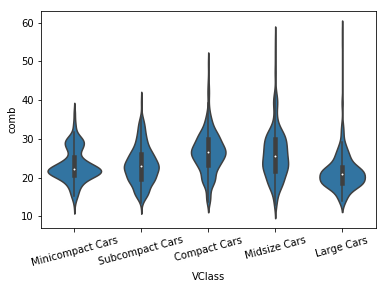

In [4]:
base_color = sb.color_palette()[0]
sb.violinplot(
    data = fuel_econ,
    x = 'VClass',y = 'comb',
    color = base_color,
#     inner = None#去掉图形中间的内容
    #inner = 'quartile'  把四分位距绘制成虚线
    #小型箱线图 箱线图这种图标表示定量变量和定性变量的关系
)

plt.xticks(rotation = 15)#稍微偏转一下标签
#得出 大型车燃油效率最低 但是意味着该车型有异常值 某些大型车 燃油效率非常高
#微型小型车 燃油效率第二高
#紧凑型车 中型车 效率最高 但是 中型车分布密度要广


## 箱线图

'\n    盒子的底部 表示第一个四分位数\n    盒子的顶部 表示第三个四分位数\n    中间的表示中位数\n    \n    须的两端表示最值\n    \n    须之外表示异常值\n    \n    须的长度取决于盒子的高度  盒子越高 须越长\n\n'

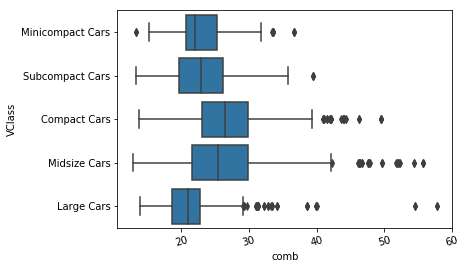

In [8]:
# 在箱线图 计算每一级的描述性统计数据 并且绘制矩形箱和须线来描述这些数据
#每个箱子中间的那个线段是中位数  上下表示 一四分位数 和第三四分位数
# 箱子顶端和底部延伸出来的须线 代表最大值和最小值


#有25%的数据位于每组水平线之间
# 在箱线图中 须线远处的点 表示异常值

#须线的上限长度通常是“四分位差” 或 箱子高度的1.5倍
'''
一组数据
1 2 3 4 5 6 7 8 9 10 11

中位数是6
1/4位数是 3   
3/4位数是  9
四分位差 就是 9-3 = 6

也就是 绘制出来的矩形 
上面那条边的y坐标减去下面那条边的y坐标

    如果数据有异常值 处于箱子的上方或者下方
    他们在途中被描绘为单独的点 并且须线到最远点
    
    之间的距离不会超过四分位差的1.5倍

'''

base_color = sb.color_palette()[0]
sb.boxplot(
    data = fuel_econ,
    y = 'VClass',x = 'comb',
    color = base_color,
    #小型箱线图 箱线图这种图标表示定量变量和定性变量的关系
)

plt.xticks(rotation = 15)#稍微偏转一下标签

'''
    盒子的底部 表示第一个四分位数
    盒子的顶部 表示第三个四分位数
    中间的表示中位数
    
    须的两端表示最值
    
    须之外表示异常值
    
    须的长度取决于盒子的高度  盒子越高 须越长

'''
